In [1]:
# PROJECT: SALARY PREDICTİON WITH MACHINE LEARNING

# Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol 
# oyuncularının maaş tahminleri için bir makine öğrenmesi projesi 

# Veri seti 

# Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır.
# Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir parçasıdır.
# Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.
# 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan
# 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.


# AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
# Hits: 1986-1987 sezonundaki isabet sayısı
# HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
# Runs: 1986-1987 sezonunda takımına kazandırdığı sayı
# RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı
# Walks: Karşı oyuncuya yaptırılan hata sayısı
# Years: Oyuncunun major liginde oynama süresi (sene)
# CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı
# CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
# CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı
# CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı
# CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
# CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
# League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
# Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
# PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
# Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
# Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
# Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
# NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör


# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from helpers import *

In [2]:
df = pd.read_csv("hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N


In [3]:
df.shape

(322, 20)

In [4]:
df.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [5]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [7]:
cat_cols

['League', 'Division', 'NewLeague']

In [8]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [9]:
# GELİŞMİŞ FONKSİYONEL KEŞİFÇİ VERİ ANALİZİ (ADVANCED FUNCTIONAL EDA)

# 1. Outliers (Aykırı Değerler)
# 2. Missing Values (Eksik Değerler)
# 3. Feature Extraction (Özellik Çıkarımı)
# 4. Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
# 5. Feature Scaling (Özellik Ölçeklendirme)

In [10]:
# 1. Outliers (Aykırı Değerler)

for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [11]:
for col in num_cols:
    print(col, check_outlier(df, col, q1=0.1, q3=0.9))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [12]:
for col in num_cols:
    if check_outlier(df, col, q1=0.1, q3=0.9):
        replace_with_thresholds(df, col, q1=0.1, q3=0.9)

        League  Ratio
League               
A          175  54.35
N          147  45.65
##########################################


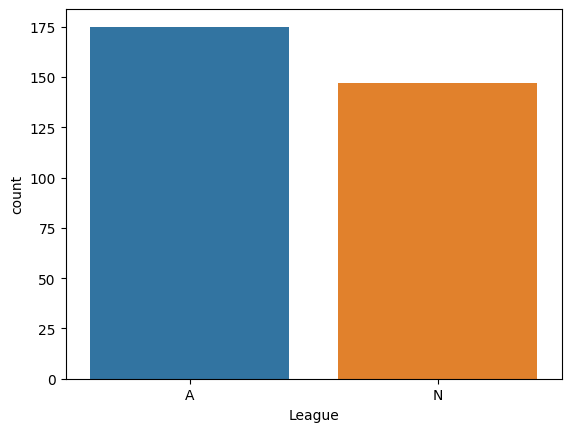

          Division  Ratio
Division                 
W              165  51.24
E              157  48.76
##########################################


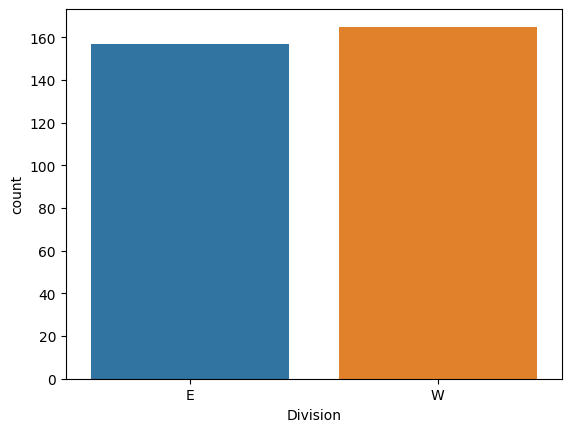

           NewLeague  Ratio
NewLeague                  
A                176  54.66
N                146  45.34
##########################################


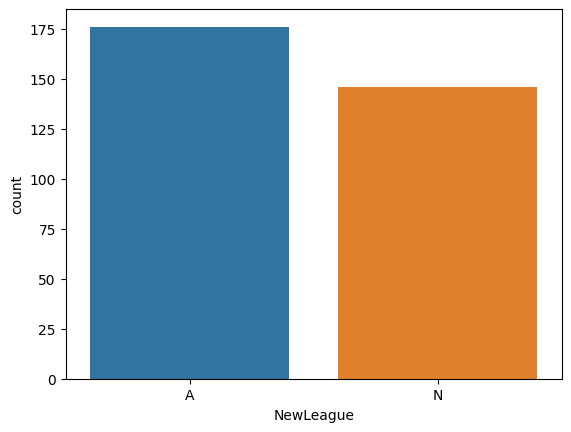

In [13]:
# Kategorik Değişken Analizi (Analysis of Categorical Variables)

for col in cat_cols:
    cat_summary(df, col, plot=True)

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


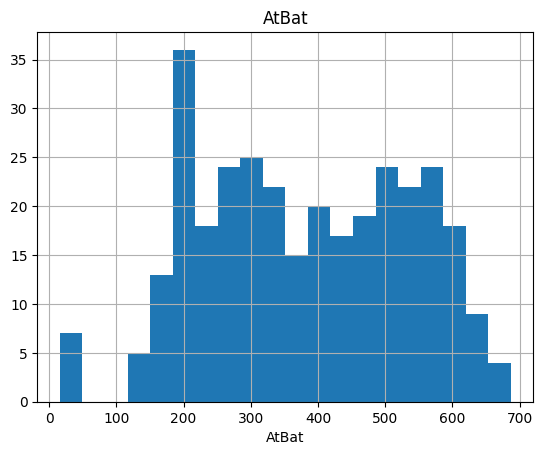

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


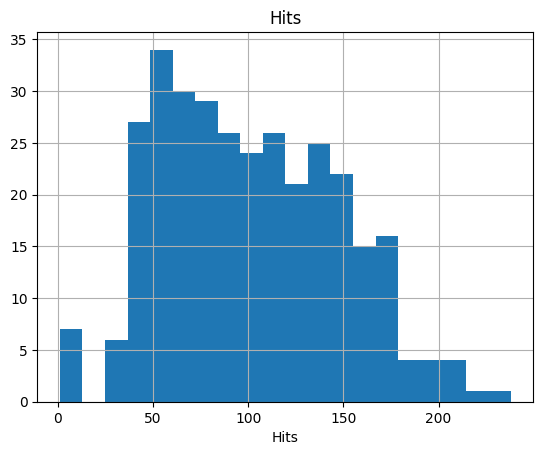

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


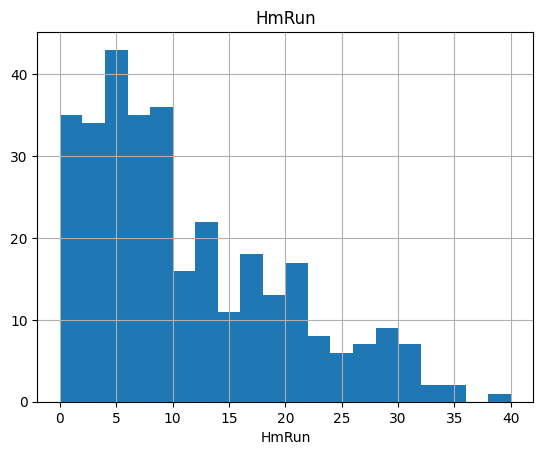

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


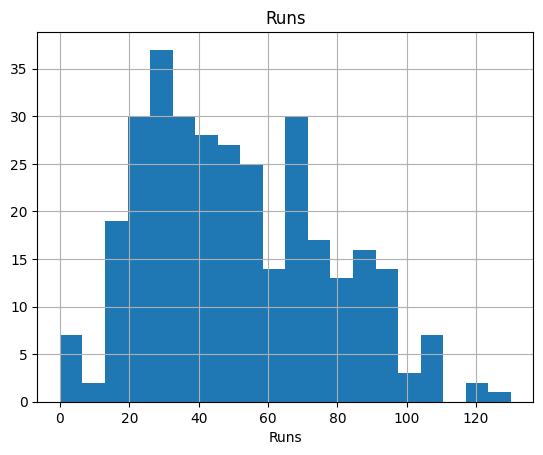

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


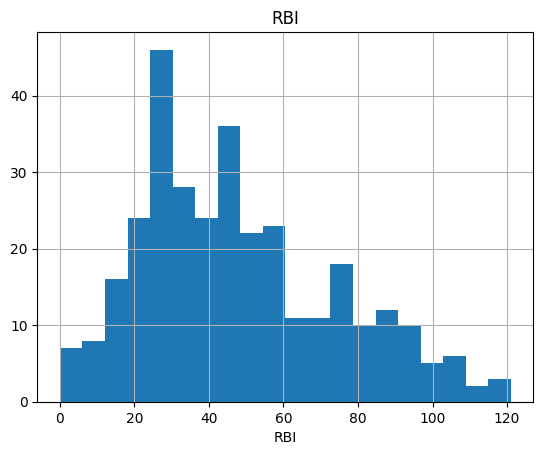

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


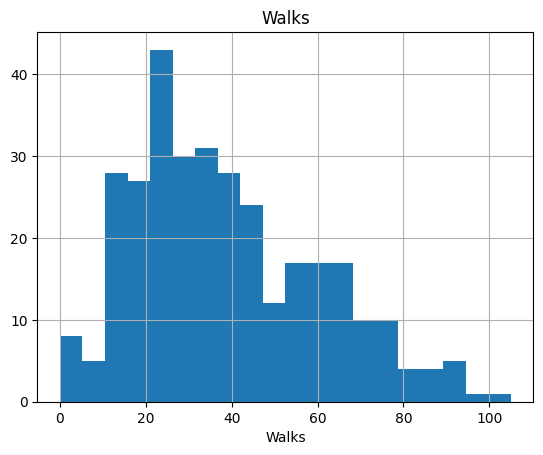

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


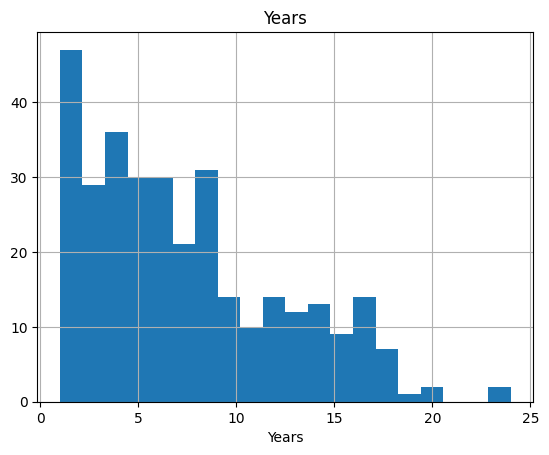

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


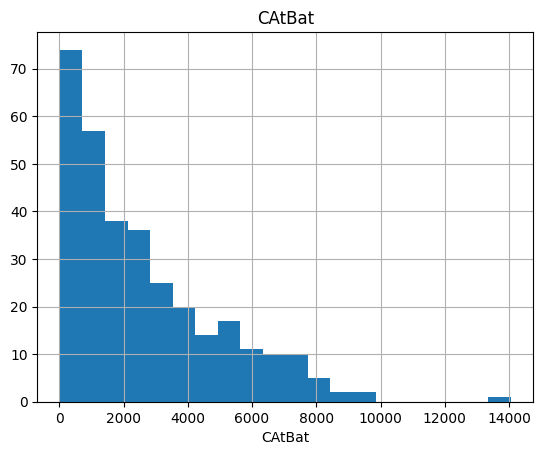

count    322.00
mean     716.84
std      650.62
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2500.34
max     4020.00
Name: CHits, dtype: float64


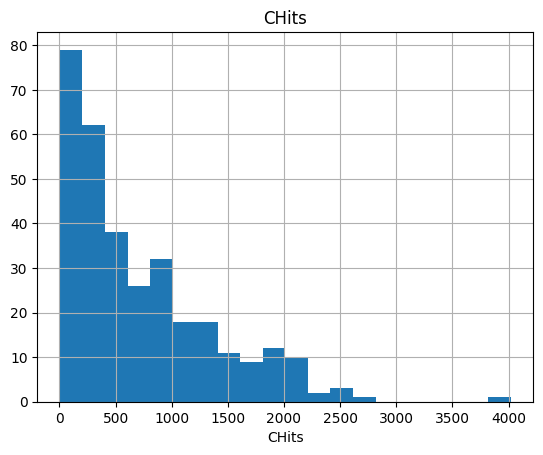

count   322.00
mean     69.28
std      85.19
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
99%     373.12
max     481.25
Name: CHmRun, dtype: float64


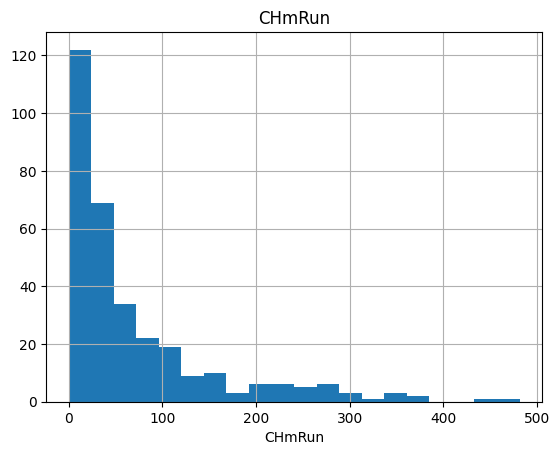

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


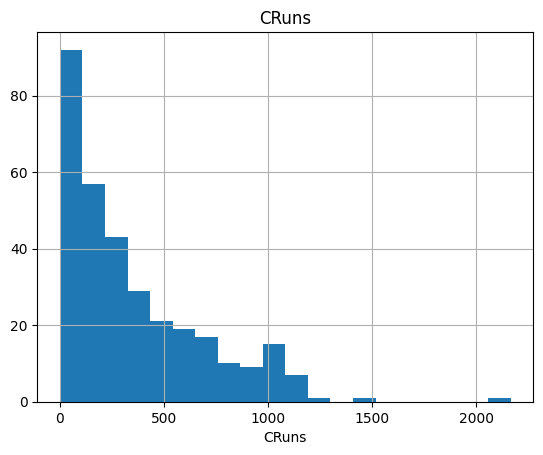

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


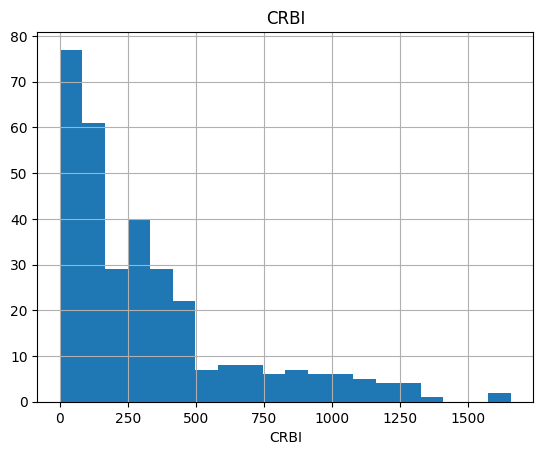

count    322.00
mean     260.23
std      267.04
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
99%     1139.14
max     1564.60
Name: CWalks, dtype: float64


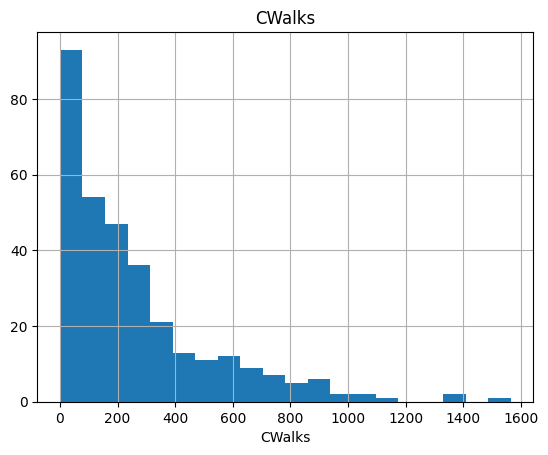

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


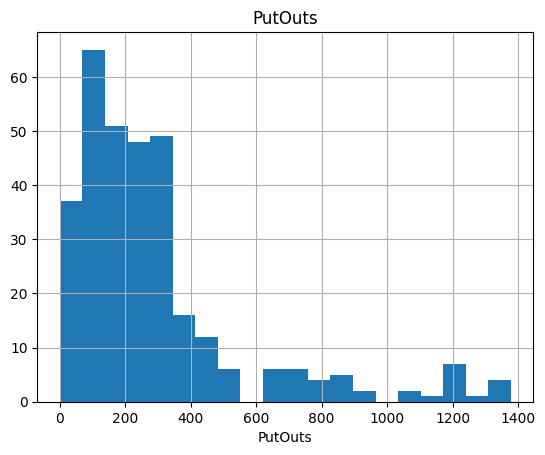

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


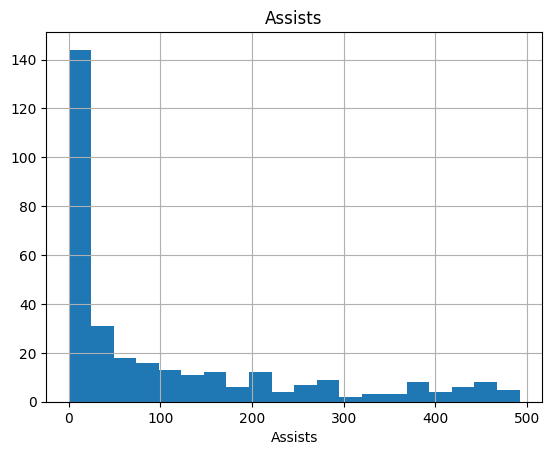

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


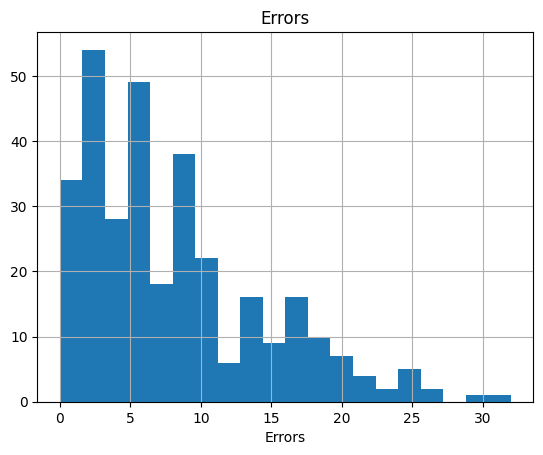

count    263.00
mean     535.93
std      451.12
min       67.50
5%        86.60
10%      100.00
20%      155.00
30%      221.00
40%      300.00
50%      425.00
60%      538.00
70%      700.00
80%      809.00
90%     1048.67
95%     1346.00
99%     2032.89
max     2460.00
Name: Salary, dtype: float64


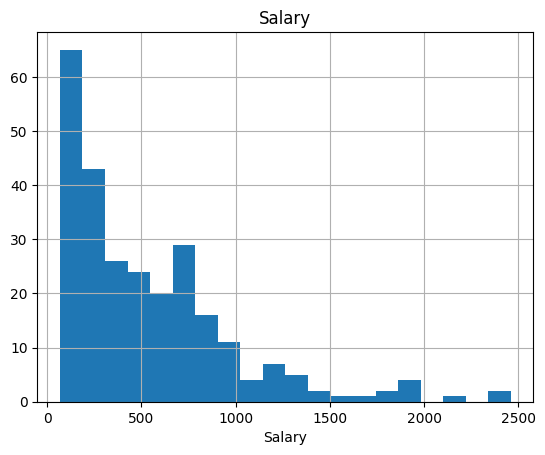

In [14]:
# Sayısal Değişken Analizi (Analysis of Numerical Variables)

for col in num_cols:
    num_summary(df, col, plot=True)

In [15]:
# Hedef Değişken Analizi (Analysis of Target Variable)

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A            542.00
N            529.12


          TARGET_MEAN
Division             
E              624.27
W              450.88


           TARGET_MEAN
NewLeague             
A               537.11
N               534.55




In [16]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66.00,1.00,30,29,14.00,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835.00,69.00,321,414,375.00,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457.00,63.00,224,266,263.00,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575.00,225.00,828,838,354.00,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101.00,12.00,48,46,33.00,N,E,805,40,4,91.50,N


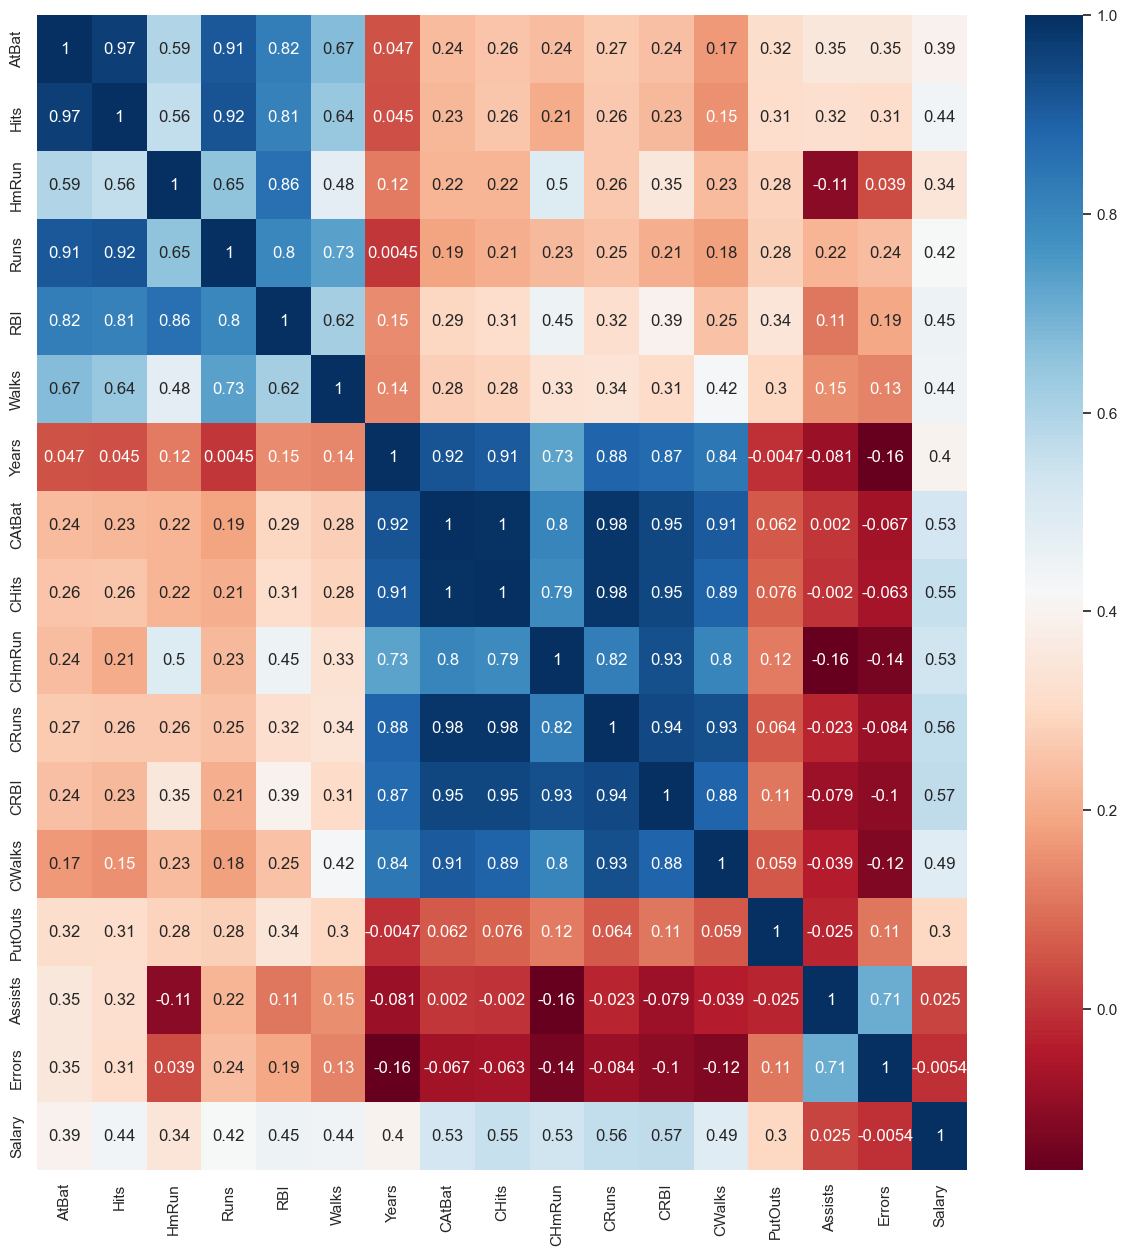

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [17]:
# Korelasyon Analizi (Analysis of Correlation)

high_correlated_cols(df, plot=True)

In [18]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()
# eksik değerler bağımlı değişkende olduğu için eksik değerleri silindi

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [20]:
# Feature Extraction (Özellik Çıkarımı)
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [21]:
new_num_cols = [col for col in num_cols if col not in ["Salary", "Years"]]

df[new_num_cols] = df[new_num_cols] + 1 # sıfıra bölünme hatasını engellemek için 1 eklendi

new_num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [22]:
df.columns = [col.upper() for col in df.columns]
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [23]:
# RATIO OF VARIABLES

# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

#Annual Averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]


# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"


# PLAYER LEVEL X DIVISION

df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

In [24]:
num_cols

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'PUTOUTS',
 'ASSISTS',
 'ERRORS',
 'SALARY']

In [25]:
cat_cols

['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 40
cat_cols: 6
num_cols: 34
cat_but_car: 0
num_but_cat: 0


In [27]:
# Label Encoding

binary_cols = [col for col in df.columns if
               df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [28]:
binary_cols

['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [29]:
# Rare Encoding 

rare_analyser(df,"SALARY", cat_cols)
df = rare_encoder(df, 0.01, cat_cols)

LEAGUE : 2
        COUNT  RATIO  TARGET_MEAN
LEAGUE                           
0         139   0.53       542.00
1         124   0.47       529.12


DIVISION : 2
          COUNT  RATIO  TARGET_MEAN
DIVISION                           
0           129   0.49       624.27
1           134   0.51       450.88


NEWLEAGUE : 2
           COUNT  RATIO  TARGET_MEAN
NEWLEAGUE                           
0            141   0.54       537.11
1            122   0.46       534.55


NEW_YEARS_LEVEL : 4
                 COUNT  RATIO  TARGET_MEAN
NEW_YEARS_LEVEL                           
Expert              65   0.25       755.11
Junior              38   0.14       186.92
Mid                 78   0.30       359.34
Senior              82   0.31       691.89


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
NEW_DIV_CAT                           
Expert-East     32   0.12       809.78
Expert-West     33   0.13       702.10
Junior-East     16   0.06       229.30
Junior-West     22   0.08       156.0

In [30]:
# One-Hot Encoding

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols, drop_first=True)

In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 50
cat_cols: 16
num_cols: 34
cat_but_car: 0
num_but_cat: 16


In [32]:
num_cols.remove("SALARY")

In [33]:
# Robust-Scaler
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [34]:
# Multiple Linear Regression

X = df.drop("SALARY", axis=1)
y = df[["SALARY"]]

In [35]:
# Model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# b + w*x
# sabit (b - bias)
reg_model.intercept_

array([655.76466015])

In [36]:
# coefficients (w - weights)
reg_model.coef_

array([[-2.45997926e+02,  2.19272219e+02, -1.05385575e+02,
         1.47336579e+02,  1.10859322e+02,  4.32869838e+01,
        -3.02517824e+02, -1.10356788e+03,  1.74893421e+03,
         2.94324414e+02, -3.28619013e+02, -4.08426082e+02,
         1.05960189e+02, -1.93076828e+01, -7.03900036e+01,
         3.55076090e+01, -3.54670064e+01,  6.26213136e+01,
         4.23854891e+01, -3.15027673e+02,  1.25470910e+03,
        -1.05470783e+03,  7.98095426e+01, -2.88847140e+02,
        -4.25060562e+01, -1.85472986e+02, -1.79538629e+00,
        -2.76695076e+01, -5.94720503e+01,  1.36426473e+01,
        -1.28642956e+03,  7.74855474e+02,  1.84776526e+01,
         2.73035290e+02,  3.30396695e+02, -2.22179798e+01,
        -3.34730834e+01, -1.48627902e+02, -2.45509691e+01,
         1.07972576e+00, -2.63490781e+01, -7.12400530e+00,
        -1.10935926e+02, -3.76919756e+01,  2.10277936e+00,
        -2.66537485e+01, -1.73738702e+01, -2.50116189e+01,
        -1.93381263e+00]])

In [37]:
#linear regression y_hat = b + w*x
np.inner(X_train.iloc[2, :].values ,reg_model.coef_) + reg_model.intercept_ # tahmin

array([666.5924230205918], dtype=object)

In [38]:
y_train.iloc[2]  # gerçek değer

SALARY   600.00
Name: 23, dtype: float64

In [39]:
np.inner(X_train.iloc[4, :].values ,reg_model.coef_) + reg_model.intercept_

array([399.2367075004143], dtype=object)

In [40]:
y_train.iloc[4]

SALARY   245.00
Name: 297, dtype: float64

In [41]:
# Tahmin

# Tahmin Başarısını Değerlendirme

# Train RMSE
y_pred = reg_model.predict(X_train)
y_pred

array([[ 725.44833825],
       [ 515.56494409],
       [ 666.59242302],
       [ 994.19364669],
       [ 399.2367075 ],
       [ 468.01240261],
       [ 307.60873475],
       [1332.88404237],
       [ 169.22876908],
       [ 501.85427965],
       [ 140.1035946 ],
       [1151.69450865],
       [ 384.82366983],
       [ 666.6434435 ],
       [ 637.07364795],
       [ -41.85352225],
       [ 265.51202819],
       [ 368.78252066],
       [ 273.96237391],
       [ 418.51339039],
       [ 450.55209415],
       [ 357.42747881],
       [ 459.84018744],
       [ 888.28534687],
       [ 219.35109331],
       [ 346.11982844],
       [ 916.4399419 ],
       [ 687.84738398],
       [  61.02619427],
       [ 559.33459697],
       [ 284.78951561],
       [ 687.00083379],
       [ 680.00924101],
       [ 271.73682696],
       [ 170.17038288],
       [ 649.49685182],
       [ 891.93842792],
       [ 852.63804523],
       [  17.39204623],
       [ 509.58073672],
       [ 939.29405717],
       [ 698.976

In [42]:
np.sqrt(mean_squared_error(y_train, y_pred))

204.7164645682361

In [43]:
# MAE
mean_absolute_error(y_train, y_pred) 

154.68649723759924

In [44]:
mean_absolute_error(y_train, y_pred) / y_train.mean()

SALARY   0.29
dtype: float64

In [45]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.786256577366203

In [46]:
# Test RMSE
y_pred = reg_model.predict(X_test)
y_pred

array([[ 632.39070586],
       [ 566.26793427],
       [ 803.82417444],
       [ 296.89432993],
       [ -32.2777371 ],
       [ 746.77903359],
       [ 400.18550518],
       [-168.61679538],
       [ 332.91555559],
       [ 457.85578655],
       [ 332.22738641],
       [1432.30910544],
       [ 397.30807975],
       [1276.7458852 ],
       [1008.73370157],
       [ 364.24670512],
       [ 825.99607899],
       [ 368.75060801],
       [-148.26429472],
       [ 599.13589148],
       [ 189.75547251],
       [ 344.0763085 ],
       [ 382.11584653],
       [ 338.24735735],
       [ 277.13186853],
       [ 532.19964927],
       [1313.12909395],
       [ 836.95648556],
       [1050.7122908 ],
       [ 536.7021663 ],
       [ 761.89555414],
       [ 371.29804614],
       [ 479.98943094],
       [ 466.52162046],
       [ 874.50823135],
       [ 490.16348786],
       [ 583.63697856],
       [ 386.40420308],
       [ 255.55431418],
       [ 603.20889661],
       [  -6.740042  ],
       [ 353.847

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

369.0526402145812

In [48]:
# Test RKARE
reg_model.score(X_test, y_test)

0.4053255157963188

In [49]:
# 10 Katlı CV RMSE

np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring="neg_mean_squared_error"))

array([281.18594712, 188.16527081, 377.03158392, 235.75439127,
       276.12984191, 218.42903392, 413.85900857, 329.16951109,
       346.50518708, 301.12427476])

In [50]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X, y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

296.7354050455542